In [35]:

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50.0,POS
1,1,85,66.0,29,0,26.6,0.351,31.0,NEG
2,8,183,64.0,0,0,23.3,0.672,32.0,POS
3,1,89,66.0,23,94,28.1,0.167,21.0,NEG
4,0,137,40.0,35,168,43.1,2.288,33.0,POS
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180,32.9,0.171,63.0,NEG
764,2,122,70.0,27,0,36.8,0.340,27.0,NEG
765,5,121,72.0,23,112,26.2,0.245,30.0,NEG
766,1,126,60.0,0,0,30.1,0.349,47.0,POS


In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,764.000000,768.000000,768.000000,764.000000,762.000000,766.000000
mean,3.845052,120.894531,69.058901,20.536458,79.799479,31.958246,0.472949,33.229765
std,3.369578,31.972618,19.383024,15.952218,115.244002,7.864874,0.332197,11.767328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.500000,0.628500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [37]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure               float64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                      object
dtype: object

### POS -> 1 and NEG -> 0 in the Outcome column

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Outcome'] = le.fit_transform(df['Outcome'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50.0,1
1,1,85,66.0,29,0,26.6,0.351,31.0,0
2,8,183,64.0,0,0,23.3,0.672,32.0,1
3,1,89,66.0,23,94,28.1,0.167,21.0,0
4,0,137,40.0,35,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180,32.9,0.171,63.0,0
764,2,122,70.0,27,0,36.8,0.340,27.0,0
765,5,121,72.0,23,112,26.2,0.245,30.0,0
766,1,126,60.0,0,0,30.1,0.349,47.0,1


### Filling all of the missing values with mean

In [39]:
df[pd.isnull(df).any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
10,4,110,92.0,0,0,37.6,0.191,NaN,0
25,10,125,NaN,26,115,31.1,0.205,41.0,1
115,4,146,NaN,0,0,31.2,0.539,61.0,1
161,7,102,74.0,40,105,NaN,0.204,NaN,0
162,0,114,80.0,34,285,NaN,0.167,27.0,0
201,1,138,NaN,0,0,40.1,0.236,28.0,0
202,0,108,NaN,20,0,27.3,0.787,32.0,0
278,5,114,74.0,0,0,NaN,0.744,57.0,0
335,0,165,76.0,43,255,NaN,0.259,26.0,0
347,3,116,0.0,0,0,23.5,NaN,23.0,0


In [40]:
df = df.fillna(value=df.mean())
df[pd.isnull(df).any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### NaNs are no more

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

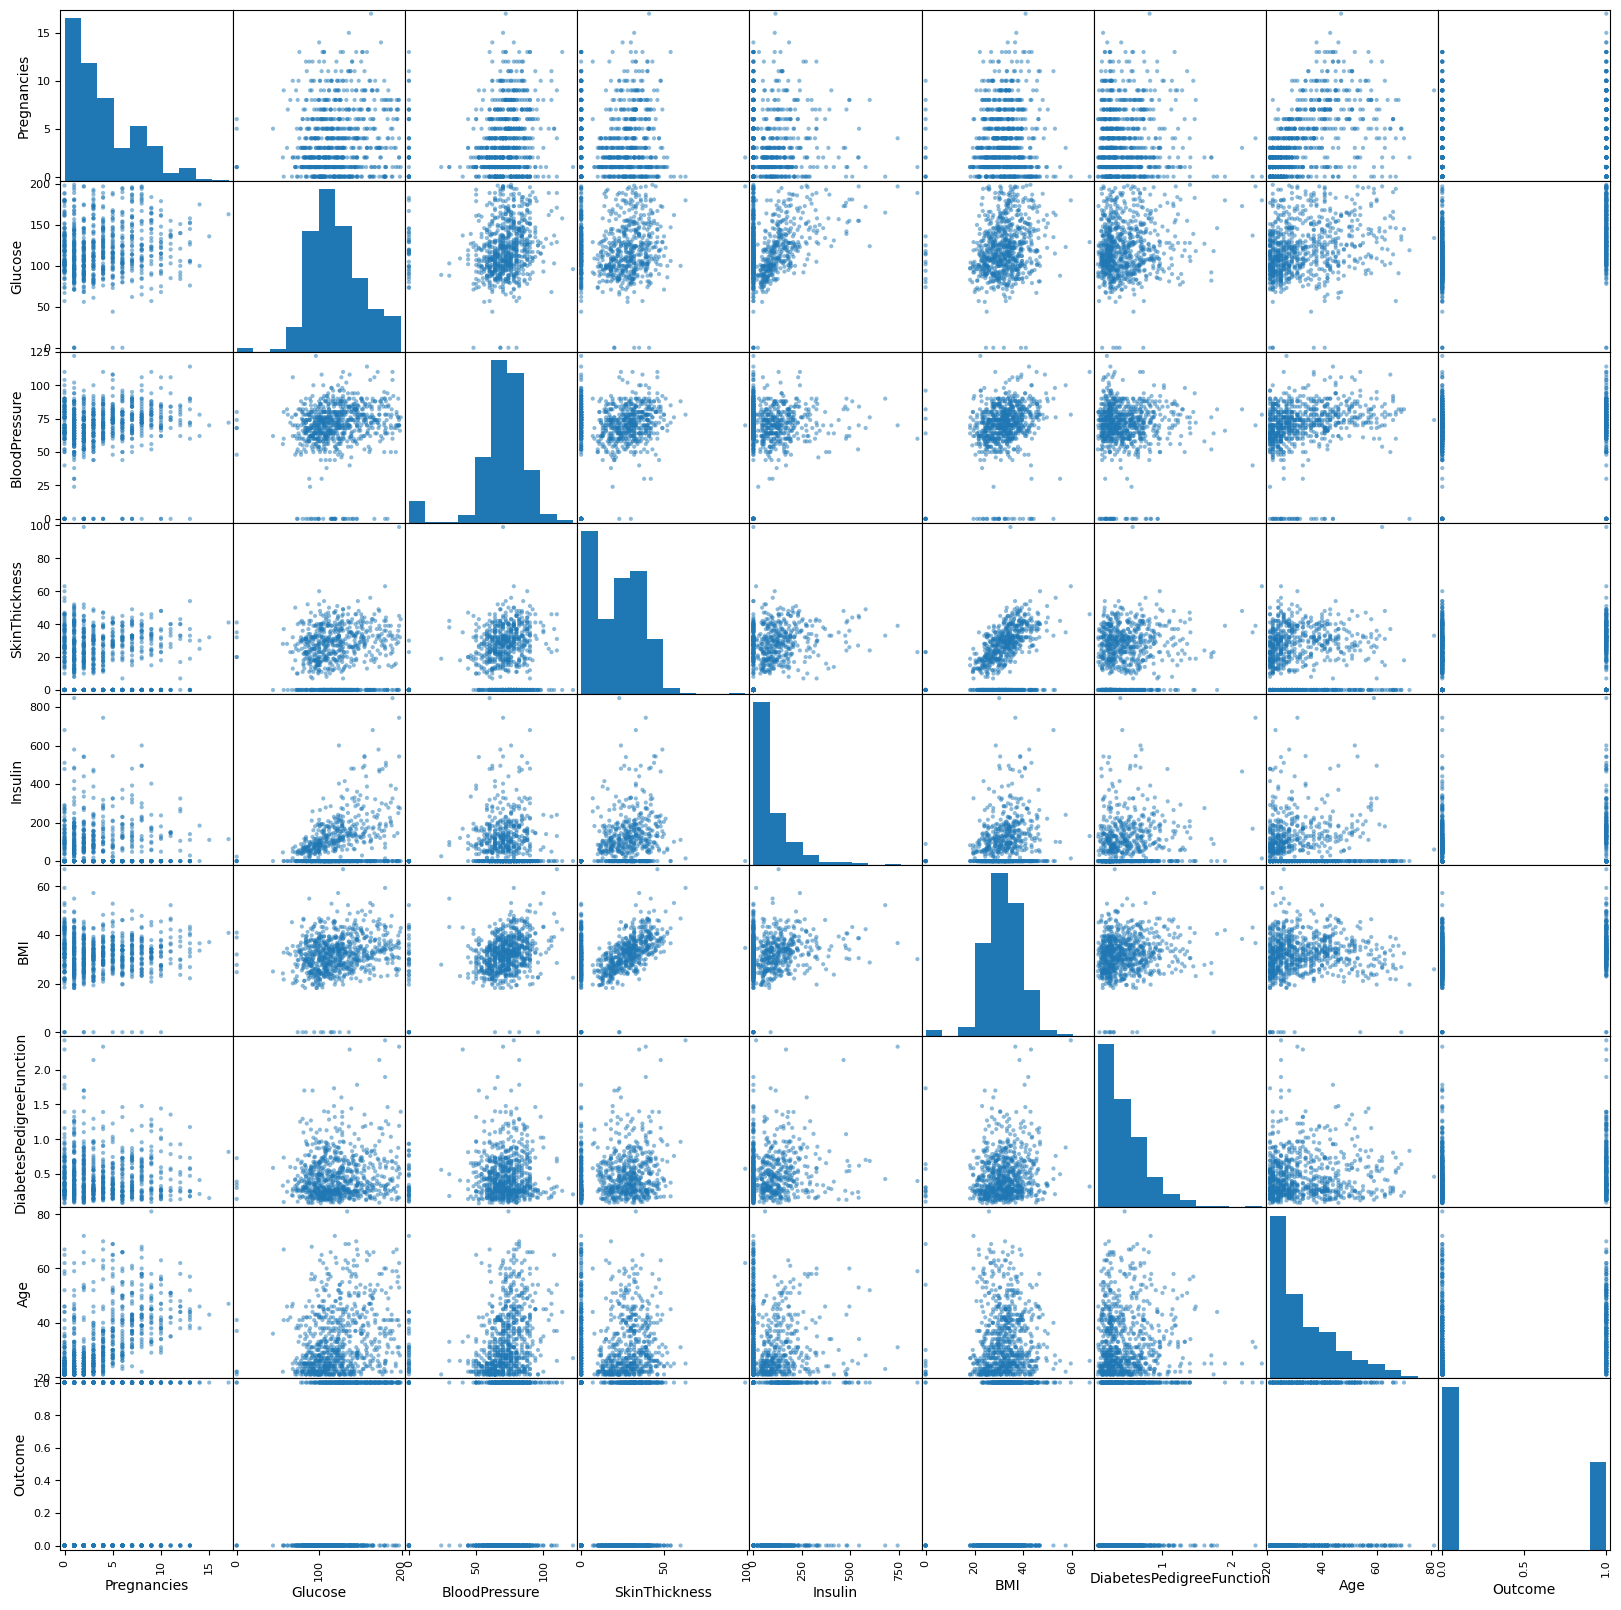

In [41]:
pd.plotting.scatter_matrix(df, figsize=(20,20))

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

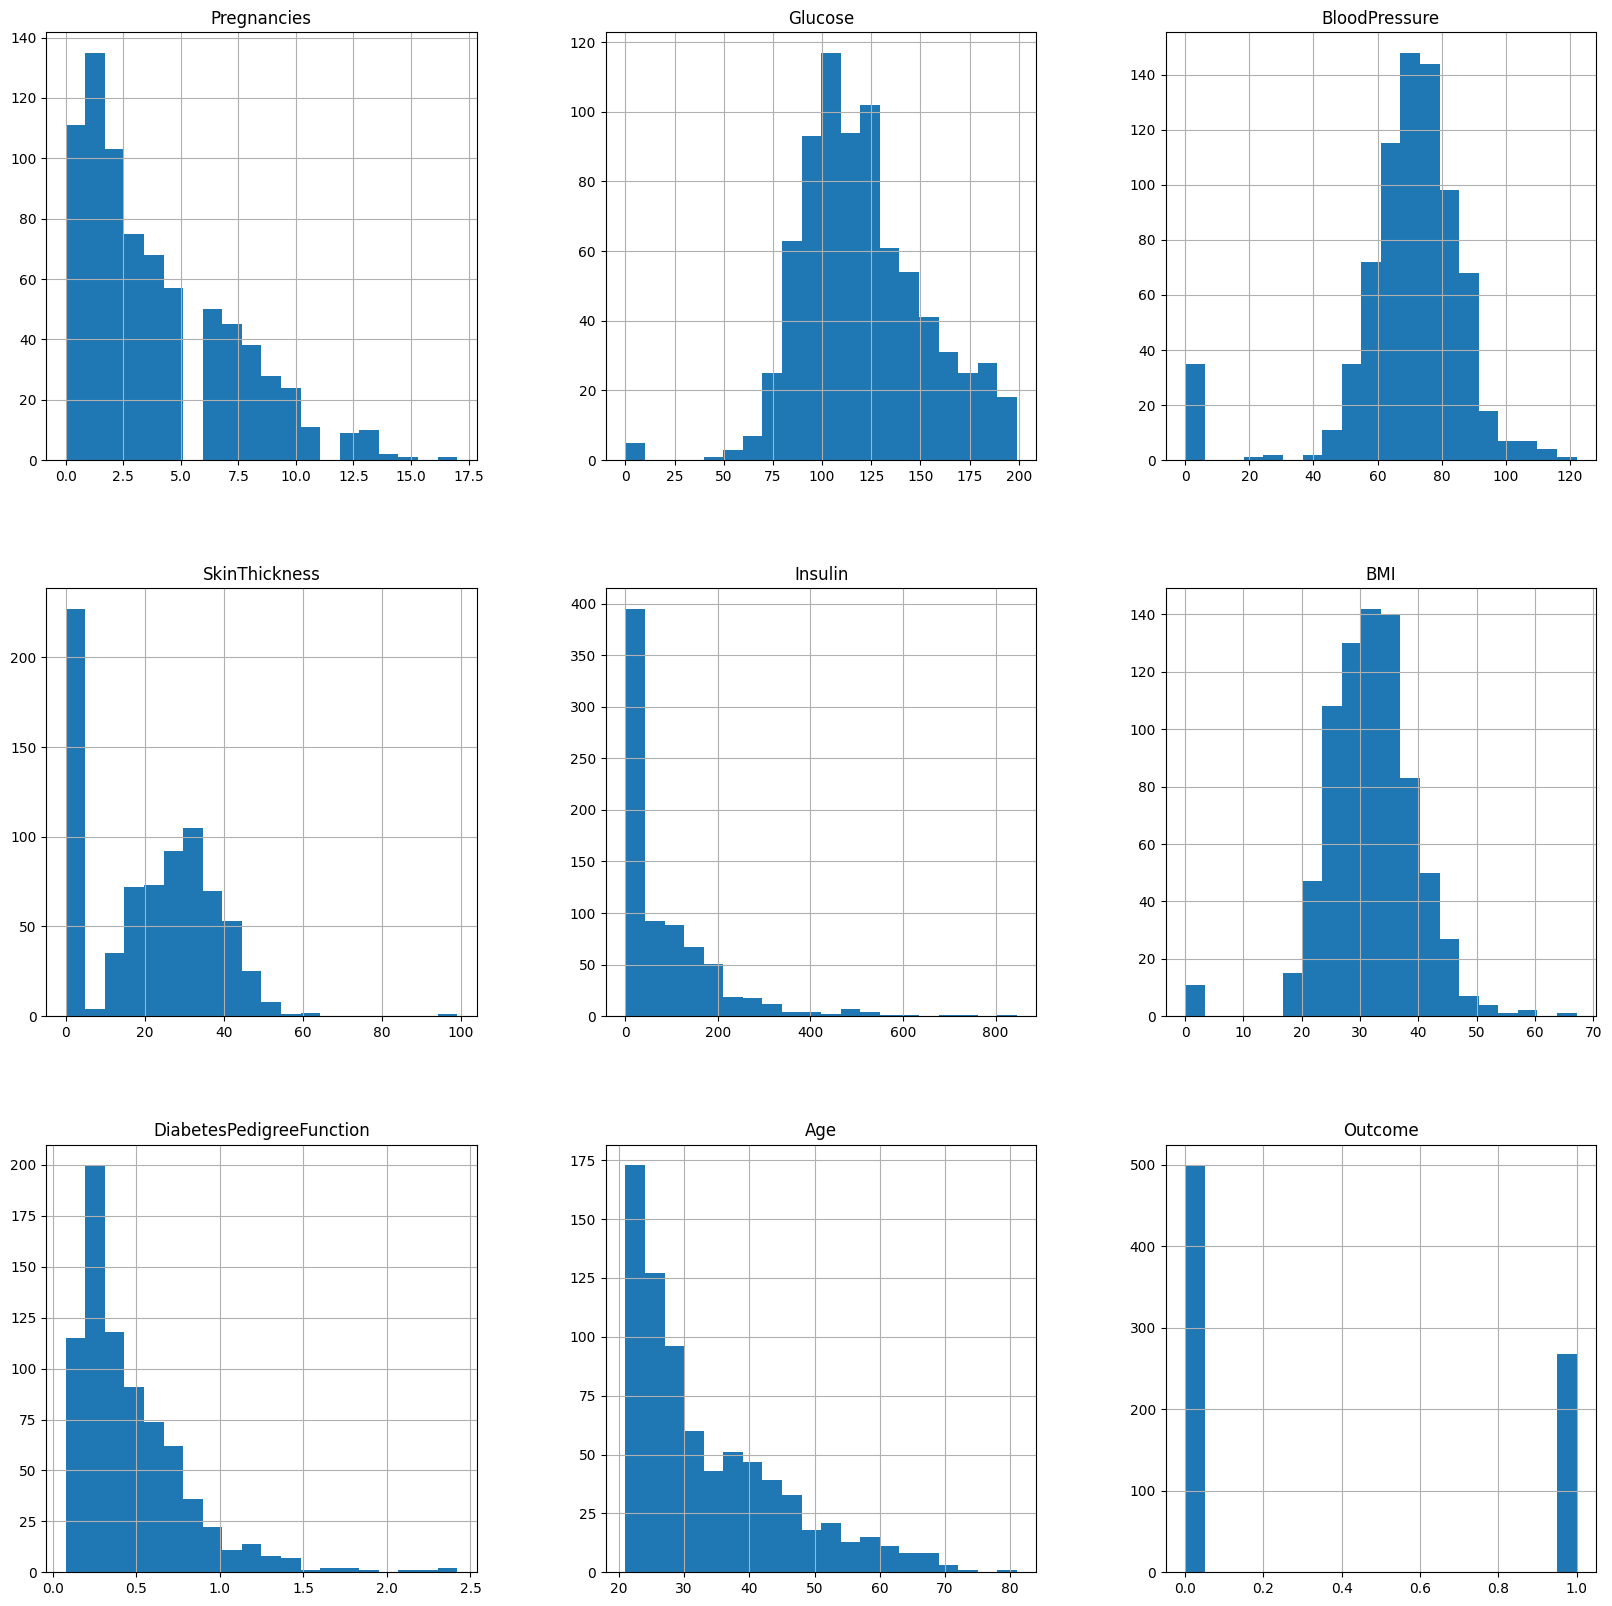

In [42]:
import matplotlib as plt

df.hist(figsize=(20,20), bins=20)

In [43]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141921,-0.081672,-0.073535,0.022705,-0.032922,0.543517,0.221898
Glucose,0.129459,1.000000,0.151055,0.057328,0.331357,0.219239,0.137523,0.264349,0.466581
BloodPressure,0.141921,0.151055,1.000000,0.210713,0.090648,0.280772,0.037710,0.236763,0.063535
SkinThickness,-0.081672,0.057328,0.210713,1.000000,0.436783,0.386544,0.182875,-0.116105,0.074752
Insulin,-0.073535,0.331357,0.090648,0.436783,1.000000,0.190210,0.184231,-0.042726,0.130548
BMI,0.022705,0.219239,0.280772,0.386544,0.190210,1.000000,0.144948,0.040922,0.297387
DiabetesPedigreeFunction,-0.032922,0.137523,0.037710,0.182875,0.184231,0.144948,1.000000,0.033778,0.171763
Age,0.543517,0.264349,0.236763,-0.116105,-0.042726,0.040922,0.033778,1.000000,0.239217
Outcome,0.221898,0.466581,0.063535,0.074752,0.130548,0.297387,0.171763,0.239217,1.000000


In [44]:
X, y = df.drop("Outcome",axis=1), df["Outcome"]

### Scaling the data

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [46]:
X_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.152232,0.907270,-0.692891,0.209428,0.465862,1.427944
1,-0.844885,-1.123396,-0.158330,0.530902,-0.692891,-0.683517,-0.368782,-0.189859
2,1.233880,1.943724,-0.261850,-1.288212,-0.692891,-1.104476,0.601946,-0.104711
3,-0.844885,-0.998208,-0.158330,0.154533,0.123302,-0.492172,-0.925212,-1.041334
4,-1.141852,0.504055,-1.504097,0.907270,0.765836,1.421282,5.488849,-0.019564
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.359273,1.722735,0.870031,0.120133,-0.913116,2.534862
764,-0.547919,0.034598,0.048712,0.405445,-0.692891,0.617631,-0.402047,-0.530449
765,0.342981,0.003301,0.152232,0.154533,0.279594,-0.734542,-0.689334,-0.275006
766,-0.844885,0.159787,-0.468891,-1.288212,-0.692891,-0.237044,-0.374830,1.172501


### Using Logistic Regression, SGDClassifier and Random Forest

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)

## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

lo_reg = LogisticRegression()
lo_reg.fit(X_train,y_train)

lo_reg_pred = lo_reg.predict(X_test)

lo_reg.score(X_test,y_test)

0.7467532467532467

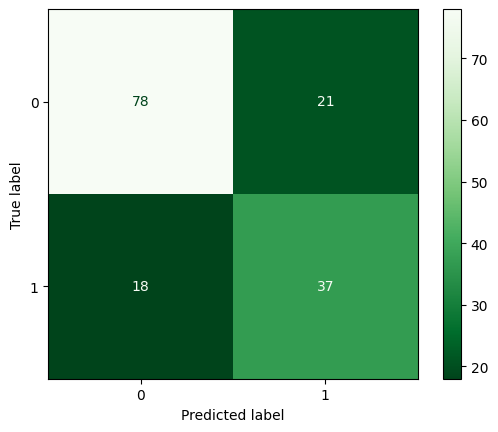

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,lo_reg_pred, cmap="Greens_r")

## SGDClassifier

In [50]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()

sgdc.fit(X_train,y_train)

sgdc_pred = sgdc.predict(X_test)

sgdc.score(X_test,y_test)

0.7012987012987013

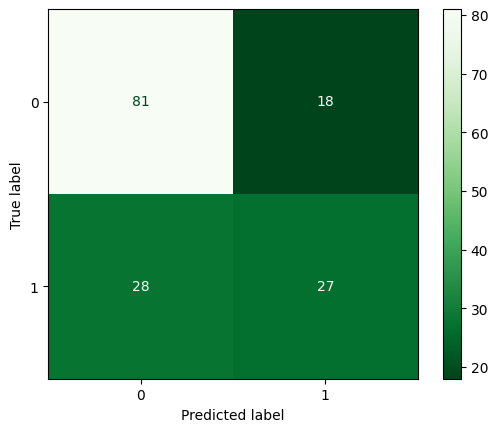

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test,sgdc_pred, cmap="Greens_r")

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

rfc_pred = rfc.predict(X_test)

rfc.score(X_test,y_test)

0.7337662337662337

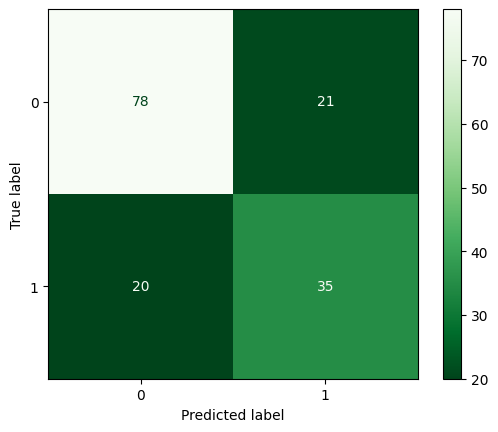

In [53]:
ConfusionMatrixDisplay.from_predictions(y_test,rfc_pred, cmap="Greens_r")

In [55]:
from sklearn.metrics import accuracy_score

print(f"Random forest: {accuracy_score(y_test,rfc_pred)}")
print(f"SGDC: {accuracy_score(y_test,sgdc_pred)}")
print(f"Logistic Regression: {accuracy_score(y_test,lo_reg_pred)}")

Random forest: 0.7337662337662337
SGDC: 0.7012987012987013
Logistic Regression: 0.7467532467532467


In [57]:
from sklearn.metrics import recall_score

print(f"Random forest: {recall_score(y_test,rfc_pred)}")
print(f"SGDC: {recall_score(y_test,sgdc_pred)}")
print(f"Logistic Regression: {recall_score(y_test,lo_reg_pred)}")

Random forest: 0.6363636363636364
SGDC: 0.4909090909090909
Logistic Regression: 0.6727272727272727


Random forest have perfect accuracy for the train data, however when it comes to the test data set it performs on a level of Logistic Regression

### Tweaking the settings

In [60]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(2,shuffle=True,random_state=42)

In [61]:
from sklearn.model_selection import cross_val_score

cross_val_score(lo_reg, X_train, y_train, cv=skf, scoring="accuracy")

array([0.77198697, 0.74918567])

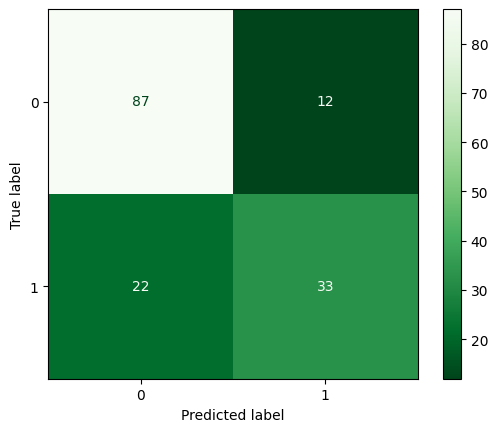

In [62]:
from sklearn.model_selection import cross_val_predict

cv_pred = cross_val_predict(lo_reg, X_test, y_test, cv=skf)

ConfusionMatrixDisplay.from_predictions(y_test,cv_pred,cmap="Greens_r")

### Optimize Random Forest for recall

In [120]:
r_rfc = RandomForestClassifier(class_weight={0:1,1:1})

r_rfc.fit(X_train,y_train)

r_rfc_pred = r_rfc.predict(X_test)

r_rfc.score(X_test,y_test)

0.7142857142857143

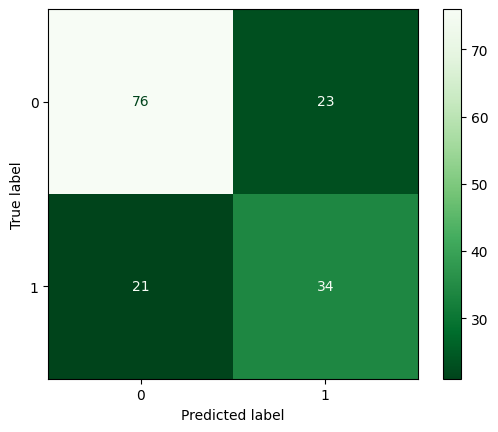

In [121]:
ConfusionMatrixDisplay.from_predictions(y_test,r_rfc_pred, cmap="Greens_r")

In [122]:
y_probs = r_rfc.predict_proba(X_test)[:,1]
print(y_probs)

[0.54 0.22 0.13 0.24 0.47 0.62 0.   0.7  0.65 0.65 0.37 0.77 0.33 0.4
 0.03 0.48 0.11 0.08 0.53 0.5  0.4  0.03 0.39 0.05 0.62 0.9  0.04 0.04
 0.17 0.16 0.76 0.7  0.78 0.82 0.52 0.66 0.81 0.43 0.15 0.72 0.1  0.31
 0.63 0.36 0.06 0.73 0.5  0.18 0.16 0.88 0.01 0.8  0.74 0.2  0.11 0.05
 0.55 0.03 0.25 0.8  0.6  0.2  0.36 0.4  0.07 0.76 0.02 0.6  0.05 0.68
 0.71 0.11 0.14 0.06 0.12 0.43 0.29 0.09 0.18 0.2  0.68 0.14 0.15 0.54
 0.29 0.89 0.66 0.42 0.27 0.09 0.01 0.26 0.03 0.55 0.52 0.51 0.7  0.09
 0.74 0.07 0.78 0.04 0.4  0.56 0.76 0.24 0.14 0.86 0.27 0.72 0.08 0.57
 0.14 0.92 0.28 0.37 0.67 0.43 0.06 0.55 0.   0.33 0.33 0.1  0.24 0.54
 0.17 0.68 0.67 0.68 0.6  0.6  0.02 0.49 0.78 0.32 0.22 0.57 0.67 0.01
 0.03 0.   0.28 0.48 0.11 0.42 0.29 0.   0.38 0.67 0.25 0.32 0.38 0.27]


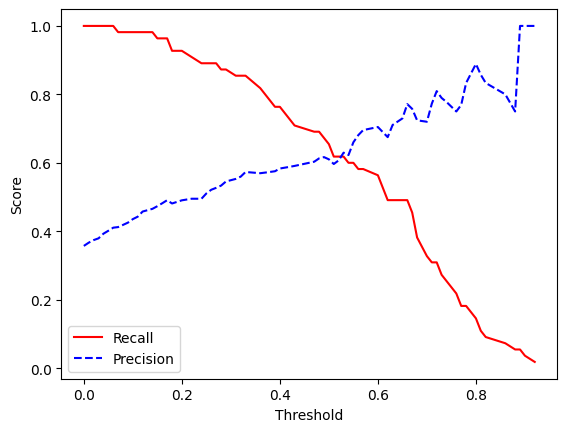

In [123]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, recall[:-1], "r-", label="Recall")
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

In [124]:
threshold = 0.06

r_rfc_better_pred = (y_probs>threshold).astype(int)

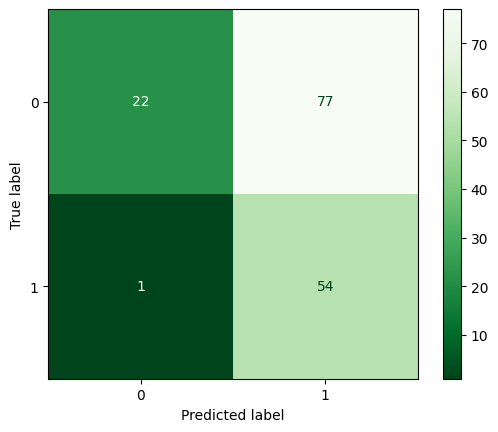

In [125]:
ConfusionMatrixDisplay.from_predictions(y_test,r_rfc_better_pred, cmap="Greens_r")